In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel('D:\GreyAtom\Glabs_exercise\lego\LCDataDictionary.xlsx')
data

,Feature,Description
0,age,Which age categories it belongs to
1,list_price,price of the set (in $)
2,num_reviews,number of reviews per set
3,piece_count,number of pieces in that lego set
4,play_star_rating,ratings
5,review_difficulty,difficulty level of the set
6,star_rating,ratings
7,theme_name,which theme it belongs
8,val_star_rating,ratings
9,country,country name


### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [4]:
# Code starts here
train = pd.read_csv('D:\\GreyAtom\\Glabs_exercise\\lego\\train.csv')
train

#target --> list_price
# Code ends here.

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4
...,...,...,...,...,...,...,...,...,...,...,...
8577,29,152.4878,13,955,4.1,0,3.7,10,3.0,13,8577
8578,19,18.2878,0,119,0.0,5,0.0,17,0.0,6,8578
8579,23,36.5878,6,76,4.2,2,4.5,12,3.4,15,8579
8580,0,12.1878,3,119,4.5,2,5.0,4,4.5,13,8580


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               8582 non-null   int64  
 1   list_price         8582 non-null   float64
 2   num_reviews        8582 non-null   int64  
 3   piece_count        8582 non-null   int64  
 4   play_star_rating   8582 non-null   float64
 5   review_difficulty  8582 non-null   int64  
 6   star_rating        8582 non-null   float64
 7   theme_name         8582 non-null   int64  
 8   val_star_rating    8582 non-null   float64
 9   country            8582 non-null   int64  
 10  Id                 8582 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 737.6 KB


In [6]:
train.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
count,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000
mean,16.649149,64.493463,14.680727,486.677464,3.697809,1.994640,3.904649,20.482172,3.597448,10.045211,4290.500000
std,8.186261,89.871631,34.867561,802.789725,1.653742,1.792387,1.617678,11.948618,1.624698,6.191468,2477.554338
min,0.000000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,19.990000,1.000000,95.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000,2145.250000
50%,19.000000,36.587800,4.000000,214.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000,4290.500000
75%,23.000000,71.298000,12.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000,6435.750000
max,30.000000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000,8581.000000


In [7]:
train.isnull().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
star_rating          0
theme_name           0
val_star_rating      0
country              0
Id                   0
dtype: int64

In [8]:
train.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country', 'Id'],
      dtype='object')

In [9]:
# rearranging columns
train = train[['Id', 'ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country', 'list_price' ]]

In [10]:
train.head()

,Id,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,list_price
0,0,8,202,2469,4.7,1,4.9,9,4.7,7,155.8800
1,1,26,9,252,4.8,0,4.6,39,4.6,20,19.9900
2,2,26,56,659,4.6,0,4.6,34,3.9,4,91.6980
3,3,11,1,19,3.0,5,4.0,13,4.0,10,24.3878
4,4,7,84,4016,4.5,1,3.9,34,3.5,10,609.9878


In [11]:
x = train.drop('list_price', axis=1)
y = train['list_price']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size=0.8, random_state=10)

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

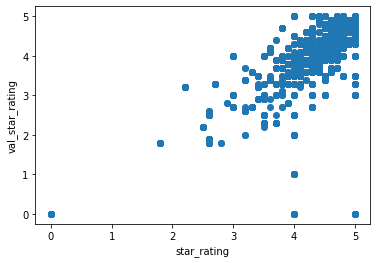

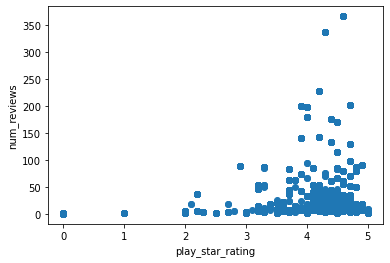

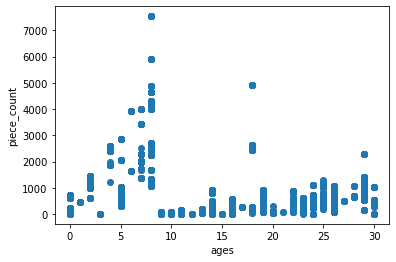

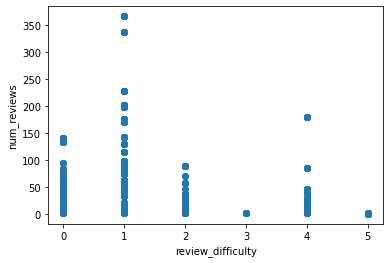

In [13]:
# Code starts here

def visualize (df, col1, col2):
    plt.scatter(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
visualize(train, 'star_rating', 'val_star_rating')
visualize(train, 'play_star_rating', 'num_reviews')
visualize(train, 'ages', 'piece_count')
visualize(train, 'review_difficulty', 'num_reviews')

# Code ends here.

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [14]:
train.corr()

,Id,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,list_price
Id,1.000000,0.012979,-0.004335,-0.001435,-0.005477,0.002682,-0.007639,-0.001884,-0.016912,-0.028541,-0.004015
ages,0.012979,1.000000,-0.160969,-0.090685,0.232847,-0.239683,0.102633,0.476178,0.116349,-0.001526,-0.076763
num_reviews,-0.004335,-0.160969,1.000000,0.542924,0.151801,-0.196846,0.160762,0.012342,0.172431,0.001953,0.439499
piece_count,-0.001435,-0.090685,0.542924,1.000000,0.174411,-0.312239,0.180903,0.173318,0.192863,0.002506,0.866119
play_star_rating,-0.005477,0.232847,0.151801,0.174411,1.000000,-0.670508,0.902573,0.151078,0.921824,-0.000958,0.145151
review_difficulty,0.002682,-0.239683,-0.196846,-0.312239,-0.670508,1.000000,-0.637901,-0.153948,-0.650333,0.006417,-0.284760
star_rating,-0.007639,0.102633,0.160762,0.180903,0.902573,-0.637901,1.000000,0.065264,0.908720,-0.003865,0.126577
theme_name,-0.001884,0.476178,0.012342,0.173318,0.151078,-0.153948,0.065264,1.000000,0.097430,-0.003625,0.192707
val_star_rating,-0.016912,0.116349,0.172431,0.192863,0.921824,-0.650333,0.908720,0.097430,1.000000,0.002413,0.114612
country,-0.028541,-0.001526,0.001953,0.002506,-0.000958,0.006417,-0.003865,-0.003625,0.002413,1.000000,0.018192


In [15]:
# Code starts here
train.corr()['list_price']
# concept-meaning and use, adv, disadv

# Code ends here.

Id                  -0.004015
ages                -0.076763
num_reviews          0.439499
piece_count          0.866119
play_star_rating     0.145151
review_difficulty   -0.284760
star_rating          0.126577
theme_name           0.192707
val_star_rating      0.114612
country              0.018192
list_price           1.000000
Name: list_price, dtype: float64

In [16]:
# without removing anything                                              --> r2score 0.7569

# dropping cols with very low correlation
# dropping 'Id'                                                          --> r2 score 0.7571 (select)
# train.drop(['Id', 'ages', 'country'], axis=1) have to use inplace=True --> r2 score 0.7567
# removing 'Id', 'ages', 'country','val_star_rating' as well             --> r2 score 0.7446
# not removing Id, Country, val_star_rating                              --> r2 score 0.7434
# Removing 'Id' and 'country'                                            --> r2 score 0.7566

x2 = train.drop(['list_price','Id'], axis=1)
y2 = train['list_price']

print(x2.head())


   ages  num_reviews  piece_count  play_star_rating  review_difficulty  \
0     8          202         2469               4.7                  1   
1    26            9          252               4.8                  0   
2    26           56          659               4.6                  0   
3    11            1           19               3.0                  5   
4     7           84         4016               4.5                  1   

   star_rating  theme_name  val_star_rating  country  
0          4.9           9              4.7        7  
1          4.6          39              4.6       20  
2          4.6          34              3.9        4  
3          4.0          13              4.0       10  
4          3.9          34              3.5       10  


In [17]:
x2_train, x2_val, y2_train, y2_val = train_test_split(x2,y2, train_size=0.8, random_state=10)

### Model building

In [18]:
# Code starts here
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)



# Code ends here.

In [19]:
# Code starts here
# after removing 3 cols

lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)
y_pred2 = lr2.predict(x2_val)



# Code ends here.

### Residual check!

- Check the distribution of the residual.

In [20]:
# Code starts here

from sklearn.metrics import r2_score

rsquared = r2_score(y_val, y_pred)
print('R2 score=',rsquared)

# Code ends here.

R2 score= 0.7569506902588153


In [21]:
# TESTING RMSE AFTER REMOVING COLS
# Code starts here

rsquared = r2_score(y2_val, y_pred2)
print('R2 score=',rsquared)

# Code ends here.

R2 score= 0.7571772233092742


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [22]:
# Code starts here
test = pd.read_csv('D:\\GreyAtom\\Glabs_exercise\\lego\\test.csv')
test.head()


# Code ends here.

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [23]:
id_col = test['Id']

In [24]:
# rearranging columns
test = test[['Id', 'ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country' ]]
test

,Id,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,9907,26,8,941,4.6,0,4.6,33,4.3,16
1,5243,11,0,19,0.0,5,0.0,13,0.0,7
2,8276,29,34,1376,4.0,1,4.3,34,3.8,12
3,6501,26,0,369,0.0,5,0.0,28,0.0,9
4,1619,11,1,19,3.0,5,4.0,13,4.0,0
...,...,...,...,...,...,...,...,...,...,...
3674,2144,13,1,75,5.0,5,5.0,21,5.0,2
3675,7242,26,21,494,4.6,0,4.5,38,4.8,10
3676,11631,26,3,85,4.7,2,4.7,34,4.7,18
3677,4639,11,3,28,5.0,2,5.0,13,4.5,6


In [25]:
test.isnull().sum()

Id                   0
ages                 0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
star_rating          0
theme_name           0
val_star_rating      0
country              0
dtype: int64

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679 entries, 0 to 3678
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 3679 non-null   int64  
 1   ages               3679 non-null   int64  
 2   num_reviews        3679 non-null   int64  
 3   piece_count        3679 non-null   int64  
 4   play_star_rating   3679 non-null   float64
 5   review_difficulty  3679 non-null   int64  
 6   star_rating        3679 non-null   float64
 7   theme_name         3679 non-null   int64  
 8   val_star_rating    3679 non-null   float64
 9   country            3679 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 287.5 KB


In [27]:
test.drop('Id', axis=1, inplace=True)

In [28]:
y_test = lr2.predict(test)

In [29]:
submission=pd.concat([id_col, pd.Series(y_test)], axis=1)
submission.rename(columns={0:'cc_cons'},inplace=True)
submission.head()

,Id,cc_cons
0,9907,115.571531
1,5243,23.982286
2,8276,147.950359
3,6501,51.634588
4,1619,-10.329507


In [30]:
submission.to_csv('final_submission.csv',index=None,header=True)

## LINEAR REGRESSION FUNCTION AND ERROR PLOT

In [31]:
# Mentoring work

In [33]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

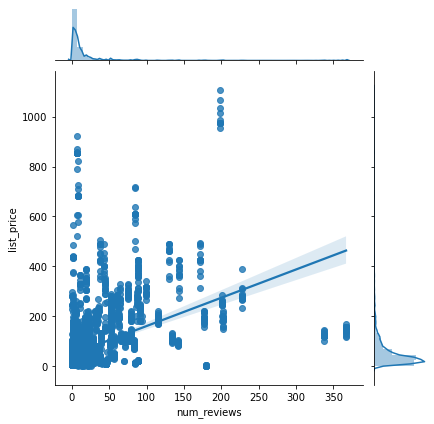

In [37]:
sns.jointplot(x=train['num_reviews'], y=train['list_price'], data=train, kind='reg')

In [36]:
linear_regression(train['num_reviews'], train['list_price'])

(1.5471948851930177, 7.491758215358819, 7900.869322766771)

In [96]:
import seaborn as sns

def lr(X, y, m_current=0, b_current=0, epochs=8000, learning_rate=0.0001):
    N = float(len(y))
    cost_list = []
    m_list = []
    
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        cost_list.append(cost)
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        m_list.append(m_current)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost, cost_list, m_list

# yield generator    

In [97]:
m_current, b_current, cost, cost_list, m_list = lr(train['num_reviews'], train['list_price'])

In [101]:
m_current, b_current, cost

(1.258987289312391, 35.57057411918304, 6644.406543477664)

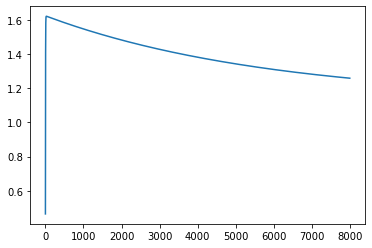

In [102]:
plt.plot(range(8000), m_list)
plt.show()

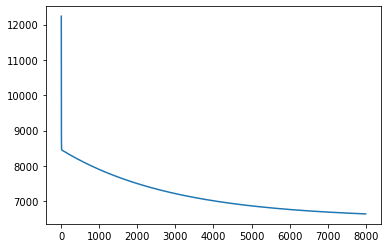

In [104]:
sns.lineplot(x=range(8000), y=cost_list)
plt.show()